# Excelファイルを読み込み、内容を変更する

In [1]:
import shutil

import numpy as np
import pandas as pd
import openpyxl
import seaborn as sns

% %matplotlib inline

## そのまま読み込む

In [2]:
src = 'resource/simple_table.xlsx'
df_raw = pd.read_excel(src, header=None)
df_raw

,0,1,2,3,4,5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,なんか説明なんか説明なんか説明なんか説明なんか説明,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,番号,名前,社員No,成績,備考
4,NaN,10,あ,01001,50,NaN
5,NaN,11,い,01002,51,なにか
6,NaN,12,う,01003,52,NaN
7,NaN,13,え,01004,53,NaN
8,NaN,14,お,01005,54,NaN
9,NaN,15,か,01006,55,NaN


## 範囲などを指定して読み込む

In [3]:
df = pd.read_excel('resource/simple_table.xlsx',
                   header=3,
                   usecols=[*range(1, 6)],
                   index_col='番号',
                   dtype={'社員No': str})
df = df.fillna(value='')
df

,名前,社員No,成績,備考
番号,,,,
10,あ,01001,50,
11,い,01002,51,なにか
12,う,01003,52,
13,え,01004,53,
14,お,01005,54,
15,か,01006,55,
16,き,01007,56,


## 内容を修正する

In [4]:
df['名前'] = '木村 ' + df['名前']
df

,名前,社員No,成績,備考
番号,,,,
10,木村 あ,01001,50,
11,木村 い,01002,51,なにか
12,木村 う,01003,52,
13,木村 え,01004,53,
14,木村 お,01005,54,
15,木村 か,01006,55,
16,木村 き,01007,56,


## 新しいシートへ書き込む（セル書式はリセット）

In [5]:
dist = 'resource/simple_table_new_sheet.xlsx'
shutil.copy(src, dist)

with pd.ExcelWriter(dist) as writer:
    writer.book = openpyxl.load_workbook(dist)
    df.to_excel(writer, sheet_name='new_sheet')

## 元々のシートへ上書きする

In [6]:
dist = 'dist/simple_table_overwritten.xlsx'
shutil.copy(src, dist)

wb = openpyxl.load_workbook(dist)
ws = wb['Sheet1']
for (_, df_row), row in zip(df.iterrows(), ws['C5:F11']):
    for (_, df_cell), cell in zip(df_row.iteritems(), row):
        cell.value = str(df_cell)

wb.save(dist)

## 元々のシートへ画像を追加する

### 画像を作成する

In [7]:
sns.set(font='IPAexGothic')

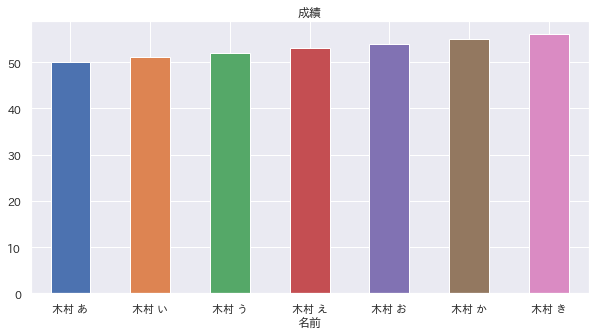

In [8]:
ax = df.set_index('名前')['成績'].plot(
    kind='bar',
    title=f'成績',
    figsize=(10, 5),
    rot=0,
)

In [9]:
image_dist = 'dist/simple_table_score.png'
ax.figure.savefig(image_dist)

### Excelシートへ画像を追加する

In [10]:
dist = 'dist/simple_table_add_image.xlsx'
shutil.copy(src, dist)

wb = openpyxl.load_workbook(dist)
ws = wb['Sheet1']

img = openpyxl.drawing.image.Image(image_dist)
ws.add_image(img, 'H5')

wb.save(dist)